# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results = pd.read_csv('data/human_body_temperature.csv')

Data has been imported to 'results' and now we will look at the data.

In [73]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


There are 3 columns of data (temperature, gender and heart_rate).
1. Is the distribution of body temperatures normal?

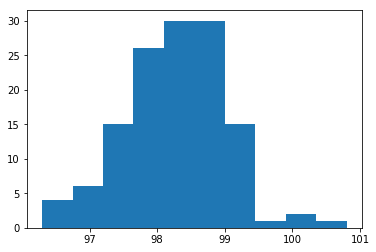

In [83]:
plt.hist(results.temperature, bins=10)
plt.show()

In [78]:
results.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

The distribution appears to be normal but will check using scipy.

In [92]:
from scipy import stats

stats.normaltest(results.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

With a p-value of greater than 0.05, we can say the distribution is normal and we will assume that this sample is representative of the population. 

3. Is the true population mean really 98.6 degrees F?

    Would you use a one-sample or two-sample test? Why?
    In this situation, is it appropriate to use the tt or zz statistic?
    Now try using the other test. How is the result be different? Why? 

Null Hypothesis => True population mean = 98.6 degrees F
Alternative Hypothesis => Ture population mean != 98.6 degrees F

We will be using a 1 sample, 2 sided t-test because we only have one set of sample data and our sample size is large enough for a t-test.  I found a function in scipy that does this for us.

In [95]:
stats.ttest_1samp(results.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

With a p-value of 0.000000241 we must reject the Null Hypothesis.  The true population mean is not equal to 98.6 degrees F

4. At what temperature should we consider someone's temperature to be "abnormal"?

    Start by computing the margin of error and confidence interval. 

Margin of Error (me) = Critical Value x Standard Error
Standard Error (se) = Standard Deviation of Sample / sqrt Sample Size

Critical Value for 95% Confidence Interval = 1.96

In [113]:
import math

cv = 1.96
mean = np.mean(results.temperature)
std = np.std(results.temperature)
n = len(results.temperature)

se = std / math.sqrt(n)
me = cv * se

upper = mean + me
lower = mean - me

print 'Lower limit is ', lower
print 'Upper limit is ', upper
print 'Anything outside that range should be considered abnormal'

Lower limit is  98.1236798044
Upper limit is  98.374781734
Anything outside that range should be considered abnormal


5. Is there a significant difference between males and females in normal temperature?

    What test did you use and why?
    Write a story with your conclusion in the context of the original problem. 

Null Hypothesis => No significant difference between males and females in normal temperature
Alternative Hypothesis => Significant difference between males and females in normal temperature
Separate males and females

In [128]:
f = results[results.gender == 'F']
m = results[results.gender == 'M']

In [121]:
f.temperature.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [122]:
m.temperature.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

We will use a 2-sided t-test because our sample size is larger than 30 (number of sameples for men and women are both 65)

In [129]:
scipy.stats.ttest_ind(f.temperature, m.temperature, equal_var=False)

Ttest_indResult(statistic=2.2854345381656112, pvalue=0.023938264182934196)

With a p-value of 0.0239 (it is < 0.05), we must reject the Null Hypothesis.